In [ ]:
# Telomere Shortening Simulation with Oxidative Stress & Visualization
import matplotlib.pyplot as plt
import random

Hello


In [15]:
# User Inputs
import ipywidgets as widgets
from IPython.display import display

def get_stress_level(default=1.0):
    try:
      stress_slider = widgets.FloatSlider(
          value=default,
          min=0.5,
          max=5.0,
          step=0.1,
          description='Oxidative Stress:',
          continuous_update=False
      )
      display(stress_slider)
      return stress_slider
    except:
       print(f"Slider available. Using default stress level: {default}")
       return default

slider = get_stress_level()





FloatSlider(value=1.0, continuous_update=False, description='Oxidative Stress:', max=5.0, min=0.5)

In [22]:
# Obtain the stress value from the slider
stress_level = slider.value
print(stress_level)

# Initialize variables 
initial_telomere = 10000
critical_length = 4000
shortening_rate = 100 # base shortening per division
telomere_length = initial_telomere
divisions = 0
telomere_over_time = []

1.7


In [ ]:
# Simulation
while telomere_length > critical_length:
  telomere_over_time.append(telomere_length)
  telomere_length -= shortening_rate*stress_level
  divisions+=1

print(divisions)

telomere_over_time.append(telomere_length)

print(telomere_over_time)

# Results of Simulation
print(f"\nWith a stress level of {stress_level}, the cell can divide {divisions} times before senescence")
# Note that human somatic cells divide approximately 40 to 60 times before they stop dividing and enter a senescent state



36
[10000, 9830.0, 9660.0, 9490.0, 9320.0, 9150.0, 8980.0, 8810.0, 8640.0, 8470.0, 8300.0, 8130.0, 7960.0, 7790.0, 7620.0, 7450.0, 7280.0, 7110.0, 6940.0, 6770.0, 6600.0, 6430.0, 6260.0, 6090.0, 5920.0, 5750.0, 5580.0, 5410.0, 5240.0, 5070.0, 4900.0, 4730.0, 4560.0, 4390.0, 4220.0, 4050.0, 3880.0, 3880.0]

With a stress level of 1.7, the cell can divide 36 times before senescence


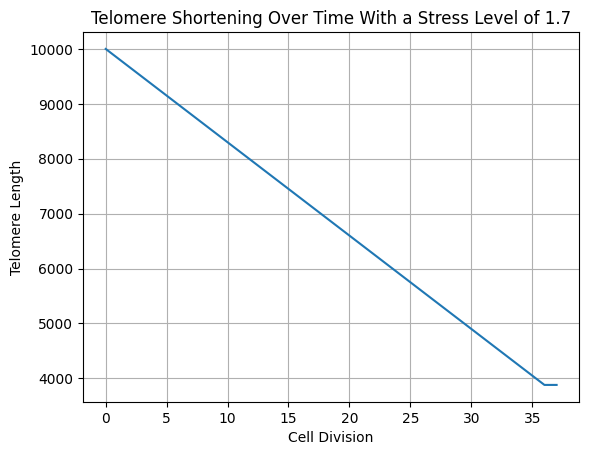

In [27]:
# Plotting the graph of Telomere Length against Cell Divisions
plt.plot(telomere_over_time)
plt.title(f"Telomere Shortening Over Time With a Stress Level of {stress_level}")
plt.xlabel("Cell Division")
plt.ylabel("Telomere Length")
plt.grid(True)
plt.show()

36 36 36


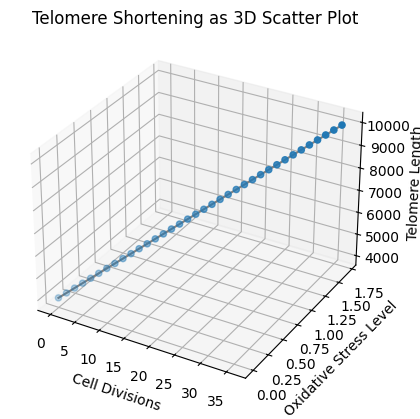

In [69]:
# from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax=plt.axes(projection='3d') # creating the 3d axes with projection='3d'

# Data for a three-dimensional line
zline = np.linspace(critical_length, initial_telomere, divisions)
xline = np.linspace(0, divisions, divisions)
yline = np.linspace(0, stress_level, divisions)

print(len(zline), len(xline), len(yline))
ax.scatter3D(xline, yline, zline, 'red')
ax.plot3D(xline, yline, zline, 'gray')


# Labels
ax.set_xlabel('Cell Divisions')
ax.set_ylabel('Oxidative Stress Level')
ax.set_zlabel('Telomere Length')
ax.set_title('Telomere Shortening as 3D Scatter Plot')

plt.show()


50


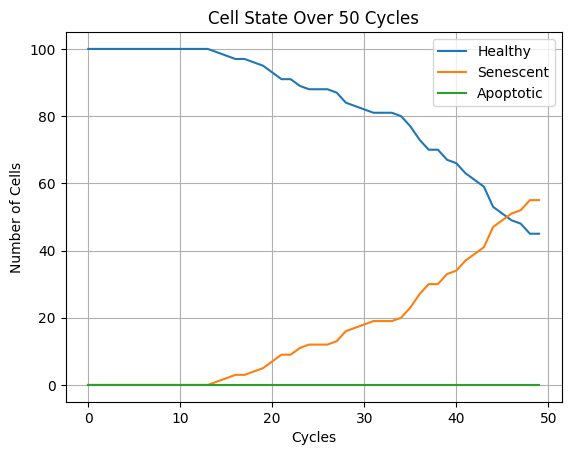

In [68]:
# Multi-Cell Aging Simulation
import random 
class Cell:
  def __init__(self):
    self.telomere = 10000
    self.dna_damage = 0.0 # expressed in percentage
    self.ros_level = 1.0 # Reactive Oxygen Species (ROS) in cells
    self.state = "Healthy"

    '''
    Reactive Oxygen Species (ROS) are chemically reactive molecules that: 
    - are produced as byproducts of normal metabolism (e.g., in mitochondria)
    - increase with oxidative stress, such as UV light, toxins, radiation
    - can damage DNA, proteins and cell membranes
    '''

  def step(self):
    if self.state != "Healthy":
      return
    
    damage_chance = random.uniform(0, 1)* self.ros_level
    if damage_chance > 0.9:
      self.dna_damage += 10 # accumlate damage if damage chance is greater than 90%

    # Telomere shortening
    self.telomere -= 100* self.ros_level

    # State transitions
    if self.dna_damage >= 50 or self.telomere <= 4000:
      self.state = 'Senescent'
    elif self.dna_damage > 90:
      self.state = 'Apoptotic'

# Simulation Parameters
num_cells = 100
cycles = 50
cells = [Cell() for _ in range(num_cells)] # Creating 100 instances of Cell class

health_stats = {"Healthy": [], "Senescent": [], "Apoptotic": []}

# Simulation Loop
for _ in range(cycles):
  counts = {"Healthy" : 0, 'Senescent' : 0, "Apoptotic" : 0}

  for cell in cells: 
    cell.step()
    counts[cell.state] += 1
  
  for state in counts: 
    health_stats[state].append(counts[state])


print(len(health_stats["Healthy"]))

# Plot Time Evolution
plt.figure()
for state in health_stats:
  plt.plot(health_stats[state], label=state) # plot health stats value against number of cycles which is fixed at 50
plt.title("Cell State Over 50 Cycles")
plt.xlabel("Cycles")
plt.ylabel("Number of Cells")
plt.legend()
plt.grid(True)
plt.show()

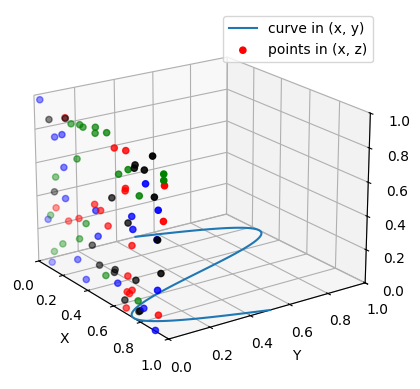

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# ax = plt.figure().add_subplot(projection='3d')

# # Plot a sin curve using the x and y axes.
# x = np.linspace(0, 1, 100)
# y = np.sin(x * 2 * np.pi) / 2 + 0.5
# ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# # Plot scatterplot data (20 2D points per colour) on the x and z axes.
# colors = ('r', 'g', 'b', 'k')

# # Fixing random state for reproducibility
# np.random.seed(19680801)

# x = np.random.sample(20 * len(colors))
# y = np.random.sample(20 * len(colors))
# c_list = []
# for c in colors:
#     c_list.extend([c] * 20)
# # By using zdir='y', the y value of these points is fixed to the zs value 0
# # and the (x, y) points are plotted on the x and z axes.
# ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# # Make legend, set axes limits and labels
# ax.legend()
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Customize the view angle so it's easier to see that the scatter points lie
# # on the plane y=0
# ax.view_init(elev=20., azim=-35, roll=0)

# plt.show()